In [ ]:
import pandas as pd

with open("naver_shopping.txt", "r", encoding="utf-8") as f:
    for i in range(10):
        print(f.readline().strip())

5	배공빠르고 굿
2	택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
5	아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요.
2	선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전화했더니 바로주신다했지만 배송도 누락되어있었네요.. 확인안하고 바로 선물했으면 큰일날뻔했네요..이렇게 배송이 오래걸렸으면 사는거 다시 생각했을거같아요 아쉽네요..
5	민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
2	비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적으로 보였는데 생각보다 진짜 별로입니다.
1	주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화도 안되고 아무런 연락을 받을수가 없으니 답답하신 분들은 다른곳에서 사시는거 추천드립니다
2	넉넉한 길이로 주문했는데도 안 맞네요 별로예요
2	보폴이 계속 때처럼 나오다가 지금은 안나네요~
2	110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신축성없는 일반실로 되어있어 빅사이즈임에도 빅사이즈같지않아요. 입고벗을때 편하게 밴딩부분이 늘어나고 입었을때도 밴딩이 잡아주어야하는데 말이죠.


In [ ]:
import pandas as pd

# Load the data
file_path = 'naver_shopping.txt'  # Adjust the path as necessary
data = pd.read_csv(file_path, sep='\t', header=None, names=['Score', 'Review'])

In [ ]:
print(data.head())

   Score                                             Review
0      5                                            배공빠르고 굿
1      2                      택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2      5  아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3      2  선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4      5                  민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Split into train and temp (80% train, 20% temp)
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)

# Step 2: Split temp into validation and test (10% each)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Check dataset sizes
print(f"Train set: {len(train_data)}")
print(f"Validation set: {len(val_data)}")
print(f"Test set: {len(test_data)}")

Train set: 160000
Validation set: 20000
Test set: 20000


In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 8.5 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
from tqdm import tqdm

okt = Okt()

In [ ]:
import re

def preprocess_text(text):
    # Remove special characters, keep only Korean, English, and numbers
    text = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9\s]", "", text)
    return text.strip()

# Apply preprocessing
train_data['Review'] = train_data['Review'].apply(preprocess_text)
val_data['Review'] = val_data['Review'].apply(preprocess_text)
test_data['Review'] = test_data['Review'].apply(preprocess_text)

In [ ]:
from konlpy.tag import Okt
from tqdm import tqdm
tqdm.pandas()

# Initialize Okt
okt = Okt()

# Basic stopwords list
stopwords = ['은', '는', '이', '가', '을', '를', '에', '의', '도', '로', '으로', '한', '하다']

# Tokenizer with stopword removal
def tokenize_and_remove_stopwords(sentence):
    tokens = okt.morphs(sentence, stem=True)
    tokens = [word for word in tokens if word not in stopwords]
    return tokens

# Apply to each dataset (now correctly referencing existing splits)
train_data['tokens'] = train_data['Review'].progress_apply(tokenize_and_remove_stopwords)
val_data['tokens'] = val_data['Review'].progress_apply(tokenize_and_remove_stopwords)
test_data['tokens'] = test_data['Review'].progress_apply(tokenize_and_remove_stopwords)

100%|██████████| 20000/20000 [02:29<00:00, 134.04it/s]


In [ ]:
# Print a few tokenized reviews
for i in range(5):
    print(f"[Original] {train_data['Review'].iloc[i]}")
    print(f"[Tokens]   {train_data['tokens'].iloc[i]}")
    print("—" * 50)

[Original] 이틀정도 설겆이하고 씽크대 청소하고 버립니다 수세미 세균걱정도 덜고 주방도 깔끔해지니 일석이조 입니다
[Tokens]   ['이틀', '정도', '설겆', '이하고', '씽', '크다', '청소', '하고', '버리다', '수세미', '세균', '걱정', '덜다', '주방', '깔끔하다', '일석이조', '이다']
——————————————————————————————————————————————————
[Original] 여러모로 사용하기 편하고 튼튼하고 좋아요
[Tokens]   ['여러', '모로', '사용', '편하다', '튼튼하다', '좋다']
——————————————————————————————————————————————————
[Original] 얇디얇아요 꼭 두장 겹쳐야함 ㅋㅋ
[Tokens]   ['얇다', '얇다', '꼭', '두', '장', '겹', '치다', '야하다', 'ㅋㅋ']
——————————————————————————————————————————————————
[Original] 액정필름 두껍고 튼튼해요 풀커버는 터치가 잘 안돼서 불편할까봐 걱정했는데 터치도 잘돼고 아이폰 잘 깨지는데 풀커버 필름이라 안심되네요
[Tokens]   ['액정', '필름', '두껍다', '튼튼하다', '풀', '커버', '터치', '자다', '안', '돼다', '불편하다', '걱정', '터치', '잘', '돼다', '아이폰', '자다', '깨지다', '풀', '커버', '필름', '이라', '안심', '되다']
——————————————————————————————————————————————————
[Original] 넘 기대했나봐요 첨 써서 그런지 어색해요
[Tokens]   ['넘다', '기대하다', '보다', '첨', '써다', '그렇다', '어색하다']
——————————————————————————————————————————————————


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Convert tokens back into space-separated strings (for fitting Tokenizer)
train_sentences = train_data['tokens'].apply(lambda x: ' '.join(x))
val_sentences = val_data['tokens'].apply(lambda x: ' '.join(x))
test_sentences = test_data['tokens'].apply(lambda x: ' '.join(x))

# Initialize Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_sentences)

In [ ]:
# Convert sentences to sequences of integers
X_train = tokenizer.texts_to_sequences(train_sentences)
X_val = tokenizer.texts_to_sequences(val_sentences)
X_test = tokenizer.texts_to_sequences(test_sentences)

In [ ]:
# Check the max length of sequences to choose padding length
max_len = max(len(seq) for seq in X_train)
print(f"Max sequence length: {max_len}")

# Pad sequences
X_train_padded = pad_sequences(X_train, maxlen=max_len)
X_val_padded = pad_sequences(X_val, maxlen=max_len)
X_test_padded = pad_sequences(X_test, maxlen=max_len)

Max sequence length: 73


In [ ]:
# Map scores: 1 or 2 → 0 (negative), 4 or 5 → 1 (positive)
train_data['label'] = train_data['Score'].apply(lambda x: 1 if x >= 4 else 0)
val_data['label'] = val_data['Score'].apply(lambda x: 1 if x >= 4 else 0)
test_data['label'] = test_data['Score'].apply(lambda x: 1 if x >= 4 else 0)

y_train = train_data['label']
y_val = val_data['label']
y_test = test_data['label']

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 40602


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Save the best model (based on val_accuracy)
checkpoint = ModelCheckpoint(
    'best_lstm_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Stop training when val_loss doesn't improve for 2 epochs
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100))  # Removed input_length
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert tokens into space-separated strings
train_sentences = train_data['tokens'].apply(lambda x: ' '.join(x))
val_sentences = val_data['tokens'].apply(lambda x: ' '.join(x))
test_sentences = test_data['tokens'].apply(lambda x: ' '.join(x))

# Fit tokenizer on train sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_sentences)

# Convert to integer sequences
X_train = tokenizer.texts_to_sequences(train_sentences)
X_val = tokenizer.texts_to_sequences(val_sentences)
X_test = tokenizer.texts_to_sequences(test_sentences)

# Find max length
max_len = max(len(seq) for seq in X_train)

# Pad sequences
X_train_padded = pad_sequences(X_train, maxlen=max_len)
X_val_padded = pad_sequences(X_val, maxlen=max_len)
X_test_padded = pad_sequences(X_test, maxlen=max_len)

# Prepare labels
y_train = train_data['label']
y_val = val_data['label']
y_test = test_data['label']

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train_padded, y_train,
    epochs=10,  # increase if you want
    batch_size=64,
    validation_data=(X_val_padded, y_val),
    callbacks=[checkpoint, early_stop]
)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.8626 - loss: 0.3281
Epoch 1: val_accuracy improved from -inf to 0.90455, saving model to best_lstm_model.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 505s 200ms/step - accuracy: 0.8626 - loss: 0.3281 - val_accuracy: 0.9046 - val_loss: 0.2510
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9239 - loss: 0.2107
Epoch 2: val_accuracy improved from 0.90455 to 0.91105, saving model to best_lstm_model.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 517s 206ms/step - accuracy: 0.9239 - loss: 0.2107 - val_accuracy: 0.9111 - val_loss: 0.2399
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.9385 - loss: 0.1738
Epoch 3: val_accuracy did not improve from 0.91105
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 546s 200ms/step - accuracy: 0.9385 - loss: 0.1738 - val_accuracy: 0.9056 - val_loss: 0.2599
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9482 - loss: 0.1452
Epoch 4: val_accuracy did not improve from 0.91105
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 479s 191ms/step - accuracy: 0.9482 - loss: 0.1452 - val_accuracy: 0.9085 - val_loss: 0.2663
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 2.


In [ ]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.9128 - loss: 0.2422
Test Accuracy: 0.9109


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define path (adjust 'MyDrive/your_folder_name' as needed)
model_path = '/content/drive/MyDrive/sentiment_lstm_model.h5'

# Save the model
model.save(model_path)

print(f"Model saved to: {model_path}")

Model saved to: /content/drive/MyDrive/sentiment_lstm_model.h5


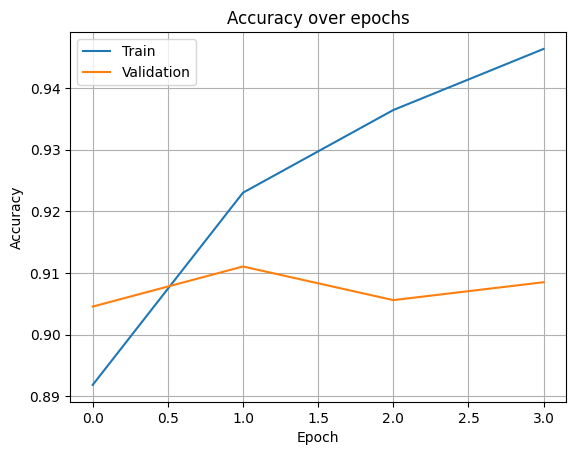

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Predict probabilities
y_pred_prob = model.predict(X_test_padded)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

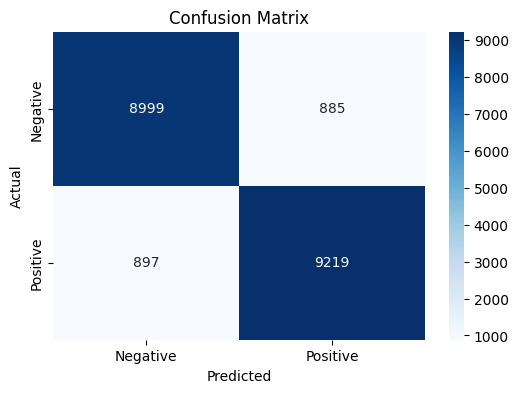

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")

# Optional full report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Accuracy:  0.9109
Precision: 0.9124
Recall:    0.9113

Classification Report:

              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91      9884
    Positive       0.91      0.91      0.91     10116

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



In [ ]:
import re

def sentiment_predict(new_sentence):
    # Text cleaning
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', new_sentence)

    # Tokenizing + stopword removal
    new_sentence = okt.morphs(new_sentence, stem=True)
    new_sentence = [word for word in new_sentence if word not in stopwords]

    # Integer encoding
    encoded = tokenizer.texts_to_sequences([new_sentence])

    # Padding
    pad_new = pad_sequences(encoded, maxlen=max_len)

    # Predict
    score = float(model.predict(pad_new))

    # Output
    if score > 0.5:
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict("배송이 너무 빠르고 포장도 꼼꼼했어요")
sentiment_predict("진짜 별로에요 다시는 안 사고 싶어요")
sentiment_predict("이딴게 상품이냐?")
sentiment_predict("줘도 안씀")
sentiment_predict("다시 구매할 의향 있어요. 다시 사용하고 싶어요")
sentiment_predict("개나 줘라")
sentiment_predict("욕 나온다 진짜")
sentiment_predict("잘 모르겠어요.")
sentiment_predict("好")
sentiment_predict("不好")
sentiment_predict("Good")
sentiment_predict("Bad")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
97.01% 확률로 긍정 리뷰입니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


<ipython-input-42-8a19453e84f3>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new))


99.78% 확률로 부정 리뷰입니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
99.54% 확률로 부정 리뷰입니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
92.33% 확률로 부정 리뷰입니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
90.20% 확률로 긍정 리뷰입니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
66.37% 확률로 부정 리뷰입니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
76.84% 확률로 부정 리뷰입니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
93.19% 확률로 부정 리뷰입니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
70.72% 확률로 부정 리뷰입니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
70.72% 확률로 부정 리뷰입니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
70.72% 확률로 부정 리뷰입니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
70.72% 확률로 부정 리뷰입니다.

